# Calspec test
test if the synth mags are correct for calspec

In [6]:
from tools import *
%matplotlib notebook
from astropy.io import fits
from glob import glob
from astropy.table import Table
from copy import deepcopy

In [16]:
passbands = at.Table.read('source_synphot/passbands/pbzptmag.txt',format='ascii')
#pbnames = [x['obsmode'] for x in passbands if x['passband'].startswith("Kep")]
#pbnames += [x['obsmode'] for x in passbands if x['passband'].startswith("TESS/tess.")]
pbnames = [x['obsmode'] for x in passbands if x['passband'].startswith("PS1")]
model_mags = 0.
model = 'AB'
pbs = source_synphot.passband.load_pbs(pbnames, model_mags, model)
pbnames = pbs.keys()

def Specs(Specs):
    specs = {}
    for spec in Specs:
        print(spec)
        model_sed = source_synphot.source.pre_process_source(spec,np.nan,'ps1g',0,Renorm=False)
        specs[spec] = model_sed

    return specs

In [17]:
path = '/Users/rridden/Documents/work/data/current_calspec/'
files = glob(path+'*.dat')
files = np.array(files)
#files = np.array(glob(path+'*.fits'))

# select only the stis models, since those are the most well callibrated sources
ind = []
for i in range(len(files)):
    if 'stis' in files[i]:
        ind += [i]
ind = np.array(ind)
files = files[ind]

cur = Specs(files)

/Users/rridden/Documents/work/data/current_calspec/hs2027_stis_005.dat
Warning, 5 of 3667 bins contained negative fluxes; they have been set to zero.
/Users/rridden/Documents/work/data/current_calspec/bd_75d325_stis_005.dat
/Users/rridden/Documents/work/data/current_calspec/sdss132811_stis_003.dat
Warning, 40 of 3660 bins contained negative fluxes; they have been set to zero.
/Users/rridden/Documents/work/data/current_calspec/hz43b_stis_005.dat
/Users/rridden/Documents/work/data/current_calspec/hd38949_stis_005.dat
Warning, 5 of 6262 bins contained negative fluxes; they have been set to zero.
/Users/rridden/Documents/work/data/current_calspec/bd21d0607_stis_005.dat
/Users/rridden/Documents/work/data/current_calspec/1805292_stisnic_005.dat
Warning, 91 of 6558 bins contained negative fluxes; they have been set to zero.
/Users/rridden/Documents/work/data/current_calspec/ngc6681_4_stis_001.dat
Warning, 26 of 2771 bins contained negative fluxes; they have been set to zero.
/Users/rridden/Do

/Users/rridden/Documents/work/data/current_calspec/1808347_stiswfc_002.dat
Warning, 94 of 6875 bins contained negative fluxes; they have been set to zero.
/Users/rridden/Documents/work/data/current_calspec/hd55677_stis_002.dat
Warning, 12 of 7207 bins contained negative fluxes; they have been set to zero.
/Users/rridden/Documents/work/data/current_calspec/109vir_stis_002.dat
/Users/rridden/Documents/work/data/current_calspec/ngc6681_7_stis_001.dat
Warning, 919 of 2788 bins contained negative fluxes; they have been set to zero.
/Users/rridden/Documents/work/data/current_calspec/hd106252_stis_005.dat
Warning, 29 of 6262 bins contained negative fluxes; they have been set to zero.
/Users/rridden/Documents/work/data/current_calspec/hd37725_stiswfc_002.dat
Warning, 57 of 7167 bins contained negative fluxes; they have been set to zero.
/Users/rridden/Documents/work/data/current_calspec/hd93521_stis_006.dat
/Users/rridden/Documents/work/data/current_calspec/kf06t2_stiswfcnic_002.dat
Warning, 1

<IPython.core.display.Javascript object>


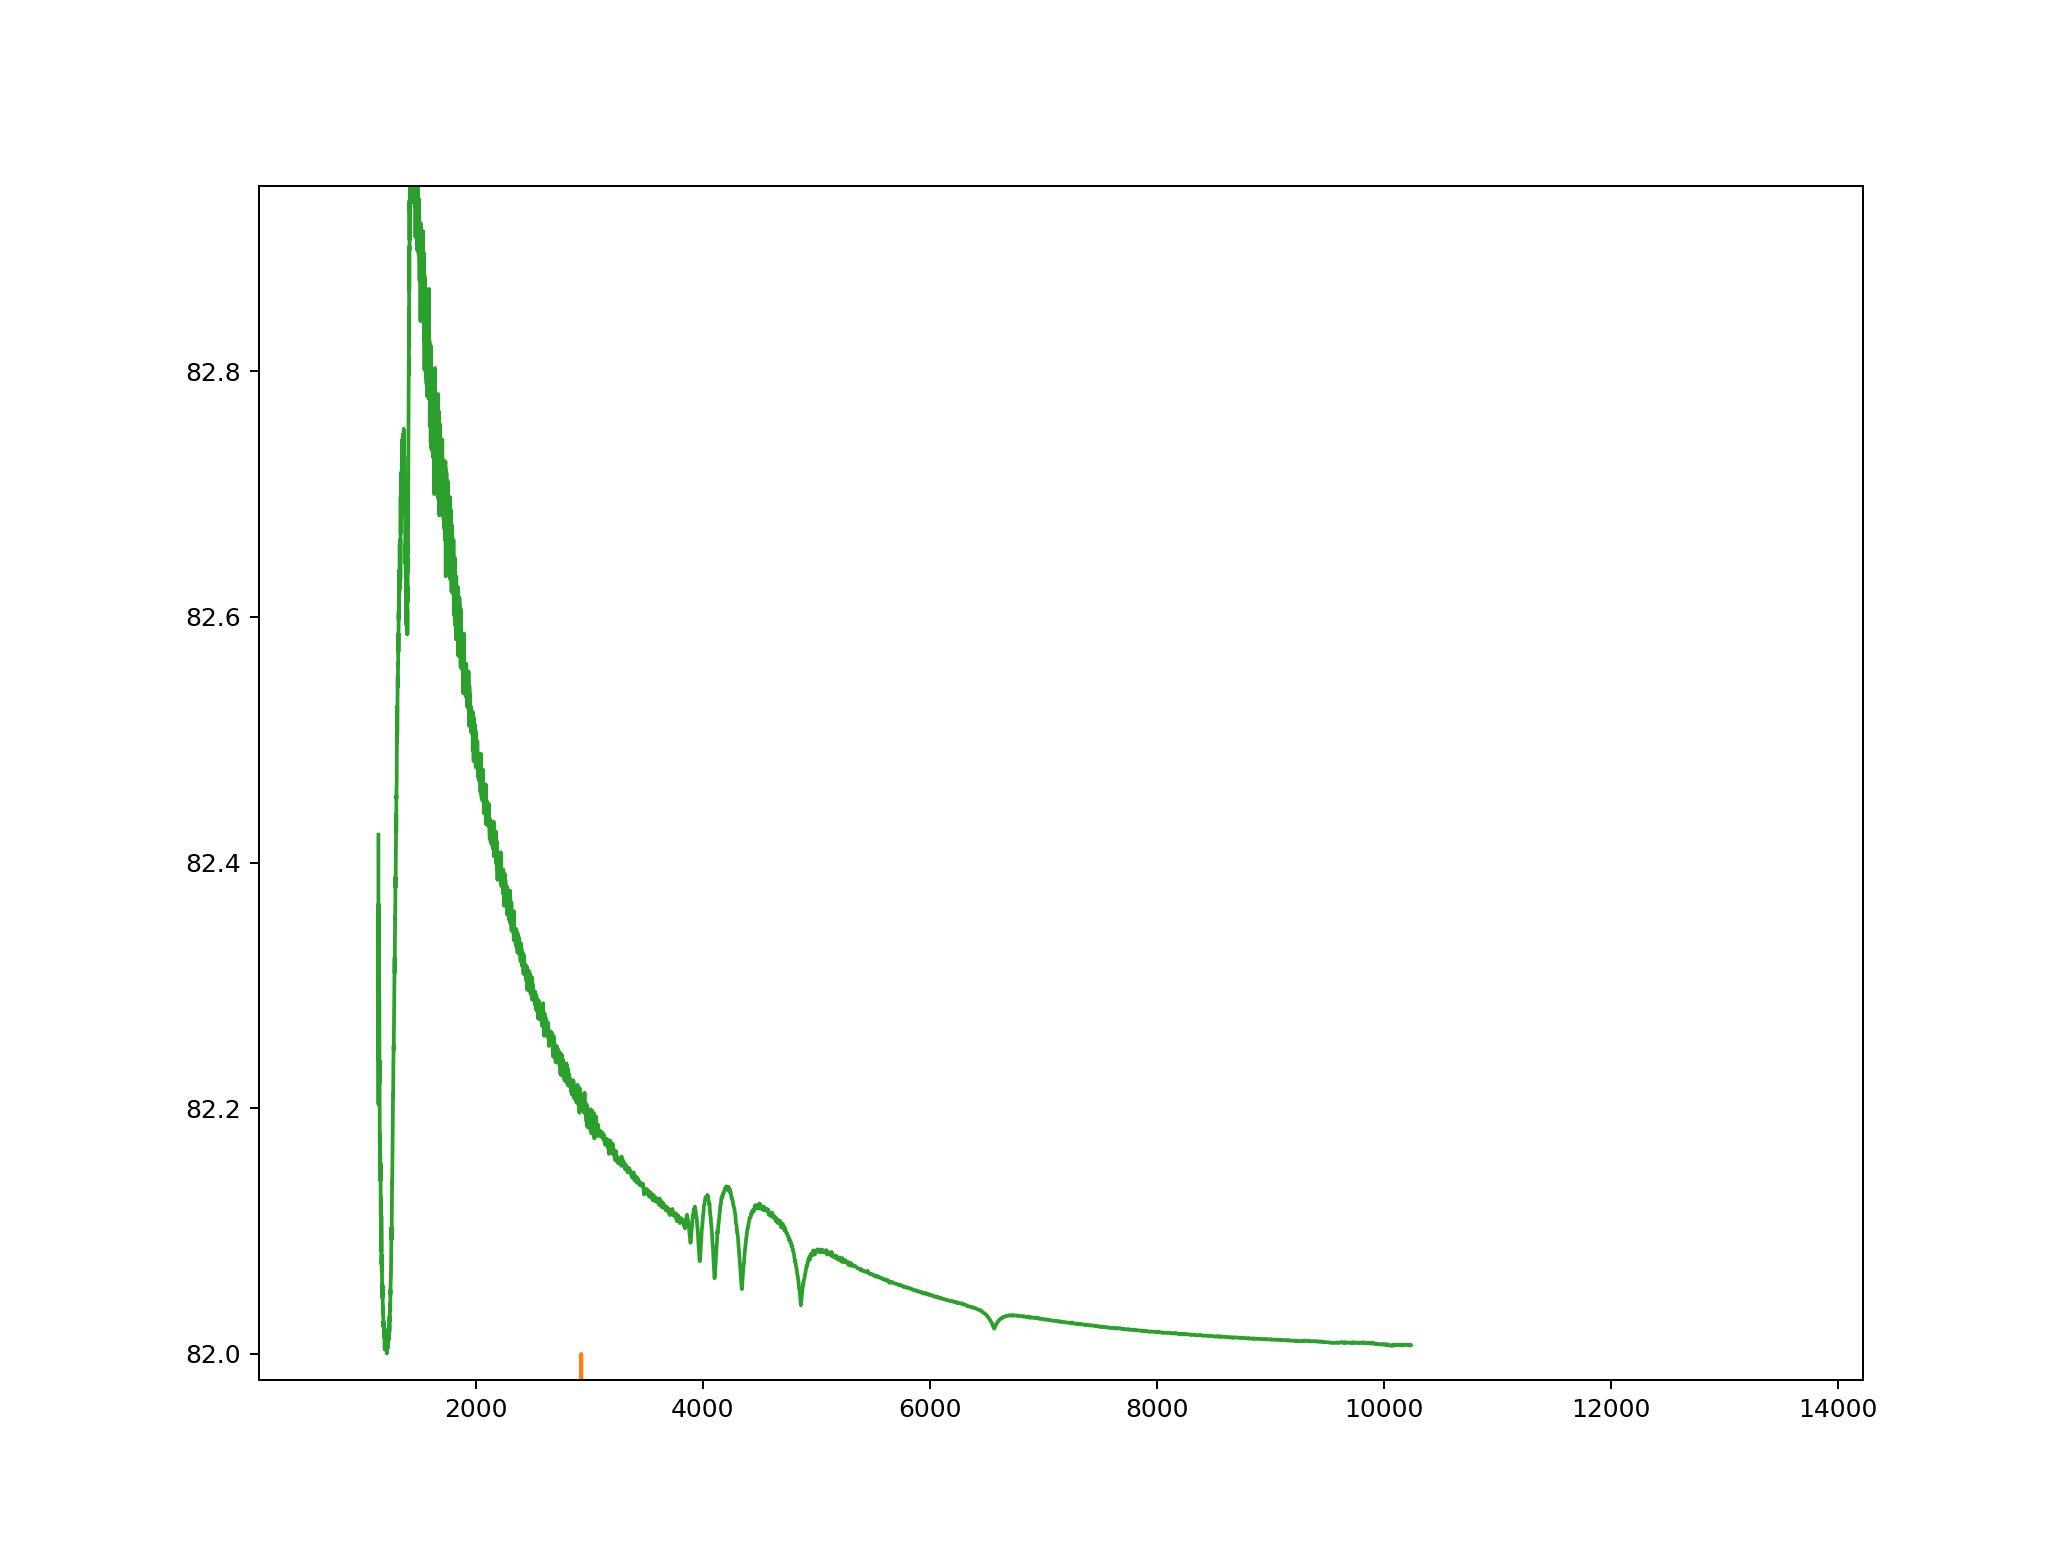

In [21]:
plt.figure()
i = 0

for name in cur.keys():
    f = cur[name].flux / np.nanmax(cur[name].flux)
    plt.plot(cur[name].wave,f + i)
    i += 1

In [6]:
ind = []
for i in range(len(syn)):
    for j in range(len(oldsyn)):
        if syn.name.iloc[i] == oldsyn.name.iloc[j]:
            ind += [i]
            
syn2 = syn.iloc[ind]
syn = syn2.sort_values('name')
oldsyn = oldsyn.sort_values('name')

model = syn['name'].values
mg = syn['g'].values
mr = syn['r'].values
mi = syn['i'].values
mz = syn['z'].values
my = syn['y'].values

# compare new and old syn

<IPython.core.display.Javascript object>


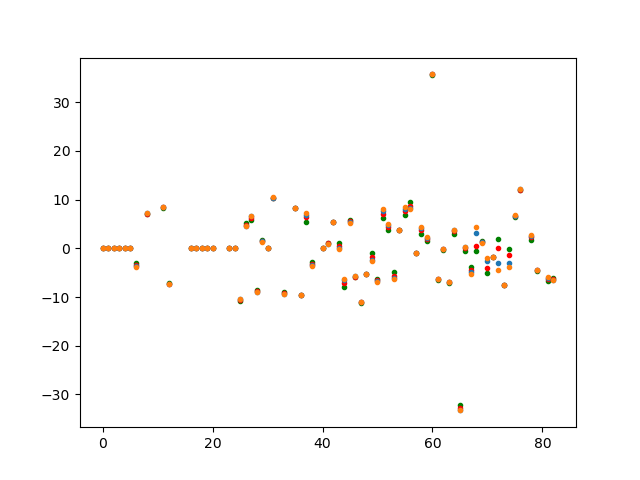

In [91]:
plt.figure()
plt.plot(oldsyn.g-syn.g,'g.')
plt.plot(oldsyn.r-syn.r,'r.')
plt.plot(oldsyn.i-syn.i,'.')
plt.plot(oldsyn.z-syn.z,'.')

In [58]:
name = []
for i in range(len(ps1)):
    val= ps1.id.iloc[i] == calsources.id.values
    name += [calsources.filename.iloc[val].values[0]]
name = np.array(name)
ps1['name'] =name

In [52]:
name

array(['1743045', 'c26202', 'hs2027', 'hz21', 'hz4', 'sdss132811',
       'sf1615_001a', 'snap2', 'wd0947_857', 'wd1026_453', 'wd1057_719',
       'wd1657_343', 'wd2341_322', 'gd50', 'hz2', 'lb227', 'snap1'],
      dtype='<U11')

In [53]:
eh = []
for n in name:
    b = []
    for j in range(len(model)):
        if n == 'hz4':
            n = 'haz4_'
        
        if n in model[j]:
            b += [j]
    eh += [b]

In [54]:
eh

[[],
 [19],
 [50],
 [51],
 [],
 [63],
 [65],
 [],
 [71],
 [72],
 [73],
 [],
 [74],
 [],
 [51],
 [],
 [66]]

In [11]:
dg = []
dr = []
di = []
dz = []
dy = []
gr = []
rm = []
gerr = []
rerr = []
ierr = []
zerr = []
yerr = []

for i in range(len(eh)):
    for j in range(len(eh[i])):
        gr += [ps1['gMeanPSFMag'].iloc[i]-ps1['rMeanPSFMag'].iloc[i]]
        rm  += [ps1['rMeanPSFMag'].iloc[i]]
        dg += [(mg[eh[i][j]] - ps1['gMeanPSFMag'].iloc[i])]
        gerr += [ps1['gMeanPSFMagErr'].iloc[i]]
        rerr += [ps1['rMeanPSFMagErr'].iloc[i]]
        ierr += [ps1['iMeanPSFMagErr'].iloc[i]]
        zerr += [ps1['zMeanPSFMagErr'].iloc[i]]
        yerr += [ps1['yMeanPSFMagErr'].iloc[i]]
        
        dr += [(mr[eh[i][j]] - ps1['rMeanPSFMag'].iloc[i])]
        di += [(mi[eh[i][j]] - ps1['iMeanPSFMag'].iloc[i])]
        dz += [(mz[eh[i][j]] - ps1['zMeanPSFMag'].iloc[i])]
        dy += [(my[eh[i][j]] - ps1['yMeanPSFMag'].iloc[i])]
gr = np.array(gr)
rm = np.array(rm)
dg = np.array(dg)
dr = np.array(dr)
di = np.array(di)
dz = np.array(dz)
dy = np.array(dy)

gerr = np.array(gerr)
rerr = np.array(rerr)
ierr = np.array(ierr)
zerr = np.array(zerr)
yerr = np.array(yerr)

mask = (~sigma_clip(dg).mask & ~sigma_clip(dr,sigma=3).mask & 
        ~sigma_clip(di).mask & ~sigma_clip(dz).mask & 
        ~sigma_clip(dy).mask &
       (abs(dg) < .1) & (abs(dr) < .1) & (abs(di) < .1))

<IPython.core.display.Javascript object>


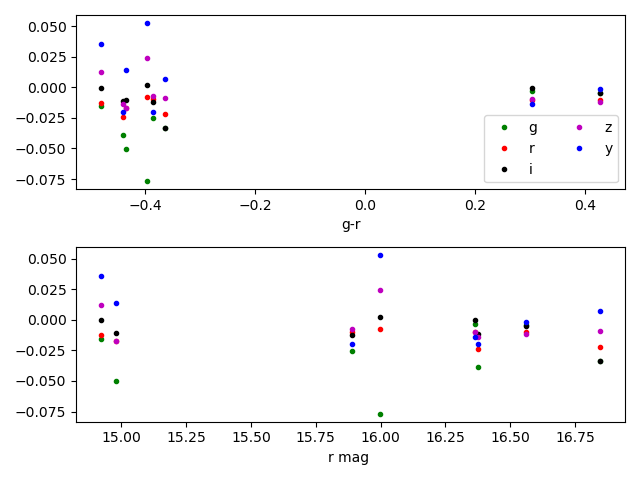

In [12]:
plt.figure()
plt.subplot(211)
plt.plot(gr[mask],dg[mask],'g.',label='g')
plt.plot(gr[mask],dr[mask],'r.',label='r')
plt.plot(gr[mask],di[mask],'k.',label='i')
plt.plot(gr[mask],dz[mask],'m.',label='z')
plt.plot(gr[mask],dy[mask],'b.',label='y')
#plt.plot(gr[mask],dy[mask],'b*',label='y')
plt.xlabel('g-r')
plt.legend(ncol=2)

plt.subplot(212)
plt.plot(rm[mask],dg[mask],'g.')
plt.plot(rm[mask],dr[mask],'r.')
plt.plot(rm[mask],di[mask],'k.')
plt.plot(rm[mask],dz[mask],'m.')
plt.plot(rm[mask],dy[mask],'b.')
plt.xlabel('r mag ')
plt.tight_layout()

<IPython.core.display.Javascript object>


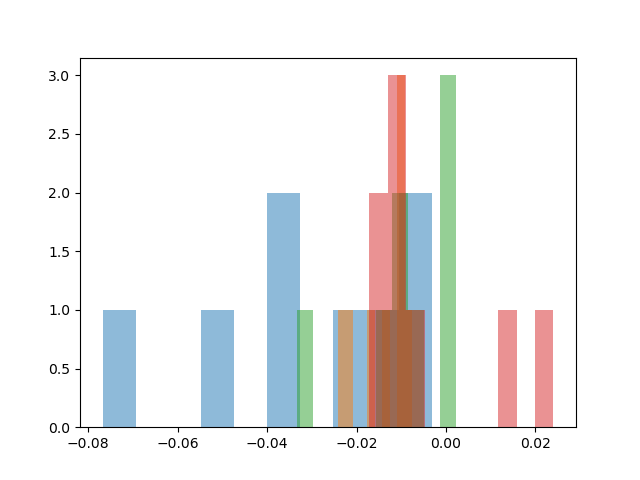

(array([2., 3., 1., 0., 0., 0., 0., 1., 0., 1.]),
 array([-0.01712283, -0.01300713, -0.00889143, -0.00477573, -0.00066003,
         0.00345567,  0.00757137,  0.01168707,  0.01580277,  0.01991847,
         0.02403417]),
 <BarContainer object of 10 artists>)

In [16]:
plt.figure()
plt.hist(dg[mask],alpha=.5)
plt.hist(dr[mask],alpha=.5)
plt.hist(di[mask],alpha=.5)
plt.hist(dz[mask],alpha=.5)
#plt.hist(dy[yind])

<IPython.core.display.Javascript object>


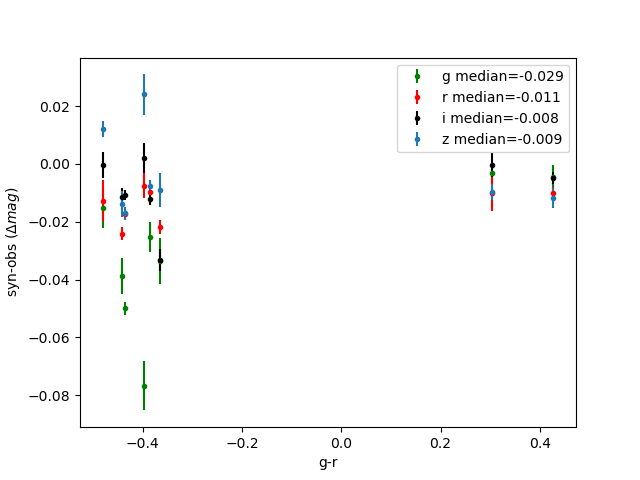

In [17]:
plt.figure()
plt.errorbar(gr[mask],dg[mask],yerr=gerr[mask],fmt='g.',label='g median=' + str(np.round(np.nanmedian(dg[mask]),3)))
plt.errorbar(gr[mask],dr[mask],yerr=rerr[mask],fmt='r.',label='r median=' + str(np.round(np.nanmedian(dr[mask]),3)))
plt.errorbar(gr[mask],di[mask],yerr=ierr[mask],fmt='k.',label='i median=' + str(np.round(np.nanmedian(di[mask]),3)))
plt.errorbar(gr[mask],dz[mask],yerr=zerr[mask],fmt='.',label='z median=' + str(np.round(np.nanmedian(dz[mask]),3)))
#plt.errorbar(gr[yind],dy[yind],yerr=yerr[yind],fmt='.',label='y')
#plt.plot(gr[rind],dr[rind],'.')
#plt.plot(gr[iind],di[iind],'.')
plt.xlabel('g-r')
plt.ylabel('syn-obs $(\Delta mag)$')
plt.legend()

In [18]:
gg = np.average(dg[mask],weights=1/gerr[mask])
rr = np.average(dr[mask],weights=1/rerr[mask])
ii = np.average(di[mask],weights=1/ierr[mask])
zz = np.average(dz[mask],weights=1/zerr[mask])

In [87]:
cor = np.array([[gg,rr,ii,zz]])

In [88]:
cor.shape

(1, 4)

In [89]:
np.savetxt('ps1_calspec_cor.txt',cor,fmt='%f')

In [80]:
cor

{'g': -0.029354428646500095,
 'r': -0.01566165541598946,
 'i': -0.009571378165956565,
 'z': -0.005817491883327945}

In [78]:
tab = pd.DataFrame(cor.T,columns=(['g','r','i','z']))

ValueError: Shape of passed values is (4, 1), indices imply (4, 4)

In [ ]:
tab

In [68]:
rr

-0.01566165541598946

In [106]:
s = pd.DataFrame(syn)

In [107]:
for i in range(len(s)):
    if 'snap' in s.name.iloc[i]:
        print(i)

66


In [108]:
s.iloc[65:70]

,g,r,i,z,y,kep,tess,name
63,16.982842,16.550225,16.376478,16.302542,16.276744,16.603533,16.380713,sf1615_001a_stisnic_008
72,15.480744,15.882056,16.194594,16.417829,16.557295,15.818418,16.207326,snap1_stisnic_007
60,-26.529724,-26.931426,-27.040589,-27.059092,-27.058837,-26.860930,-27.026173,sun_reference_stis_002
68,17.463649,16.015591,13.230917,11.957479,11.304819,14.168710,12.477915,vb8_stiswfcnic_002
67,13.953521,14.296974,14.612682,14.864446,15.033111,14.257160,14.634471,wd0308_565_stis_006


In [36]:
for i in range(len(o)):
    if 'snap' in o['name'].iloc[i]:
        print(i)

76
88


In [37]:
o.iloc[76:89]

,g,r,i,z,y,kep,tess,name
76,15.480744,15.882056,16.194594,16.417829,16.557295,15.818418,16.207326,snap1_stisnic_007
77,11.520151,12.012552,12.410415,12.704592,12.917036,11.929109,12.422916,g191b2b_stiswfcnic_002
78,9.378407,9.529099,9.696604,9.795191,9.811655,9.524372,9.693563,hd55677_stis_002
79,3.596307,3.832272,4.049708,4.174246,4.207803,3.809060,4.044539,109vir_stis_002
80,15.278496,14.639646,14.219571,13.913829,13.687342,14.620464,14.122403,ngc6681_7_stis_001
81,7.604975,7.258005,7.155641,7.143084,7.138780,7.317863,7.171145,hd106252_stis_005
82,8.292574,8.366726,8.496295,8.602544,8.626821,8.377159,8.506912,hd37725_stiswfc_002
83,9.593633,9.351217,9.263166,9.247916,9.249152,9.390890,9.276433,bd_17d4708_stisnic_007
84,6.796466,7.199890,7.554234,7.815708,8.002424,7.145342,7.567244,hd93521_stis_006
85,14.417200,13.596901,13.252682,13.080709,12.986820,13.652837,13.231922,kf06t2_stiswfcnic_002


# compare to the syn values gautham presents

In [23]:
gautham = pd.read_csv('gautham_syn_vals.csv')

In [24]:
gautham = gautham.drop([5])

In [25]:
gautham

,object,objid,g,r,i,z,obs_g,obs_r,obs_i,obs_z,err_g,err_r,err_i,err_z
0,Snap-1,171512473989538506,15.498,15.894,16.202,16.425,15.506,15.892,16.207,16.425,6,4,2.0,2
1,WD1657+343,149172547130238286,16.228,16.693,17.074,17.360,16.230,16.700,17.074,17.375,4,2,2.0,7
2,SF1615+001A,108002445593133309,16.991,16.563,16.384,16.317,16.988,16.560,16.381,16.314,4,2,2.0,3
3,Snap-2,174682449420946620,16.443,16.045,15.905,15.874,16.443,16.053,15.912,15.873,5,3,3.0,2
4,C26202,74560531369524156,16.673,16.368,16.264,16.243,16.669,16.365,16.258,16.250,4,5,4.0,3
6,GD153,134431942595767273,13.128,13.591,13.978,14.263,13.134,13.598,13.990,14.261,7,1,11.0,2


In [26]:
inds = []
gind = []
for j in range(len(gautham['object'])):
    o = gautham['object'].iloc[j]
    name = o.lower()
    name = name.replace('+','_').replace('-','')
    print(name)
    for i in range(len(model)):
        n = model[i].split('_stis')[0]
        if n == name:
            inds += [i]
            gind += [j]
            print(i)
        else:
            inds += []

snap1
66
wd1657_343
sf1615_001a
65
snap2
c26202
19
gd153
26


In [27]:
gautham = gautham.iloc[gind]


In [32]:
gautham

,object,objid,g,r,i,z,obs_g,obs_r,obs_i,obs_z,err_g,err_r,err_i,err_z
0,Snap-1,171512473989538506,15.498,15.894,16.202,16.425,15.506,15.892,16.207,16.425,6,4,2.0,2
2,SF1615+001A,108002445593133309,16.991,16.563,16.384,16.317,16.988,16.560,16.381,16.314,4,2,2.0,3
4,C26202,74560531369524156,16.673,16.368,16.264,16.243,16.669,16.365,16.258,16.250,4,5,4.0,3
6,GD153,134431942595767273,13.128,13.591,13.978,14.263,13.134,13.598,13.990,14.261,7,1,11.0,2


In [44]:
np.nanmedian(syn.iloc[inds]['r'].values - gautham['obs_r'].values)

-0.010038992601316465

In [28]:
inds

[66, 65, 19, 26]

In [65]:
syn['g'].iloc[inds].values - gautham['g'].values

array([-0.01725639, -0.00815796, -0.00716763, -0.01538183])

<IPython.core.display.Javascript object>


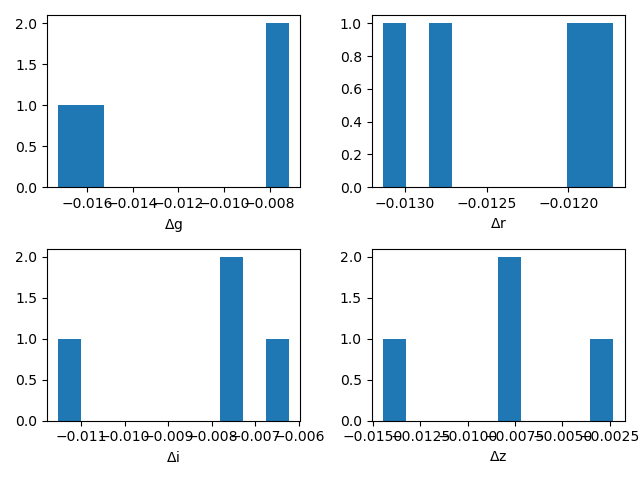

<IPython.core.display.Javascript object>


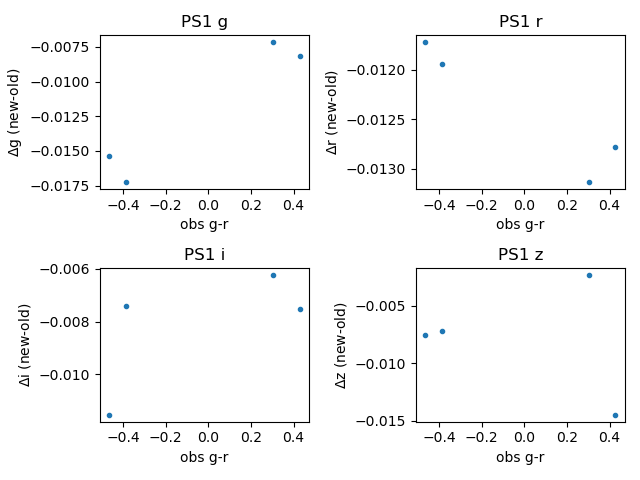

<IPython.core.display.Javascript object>


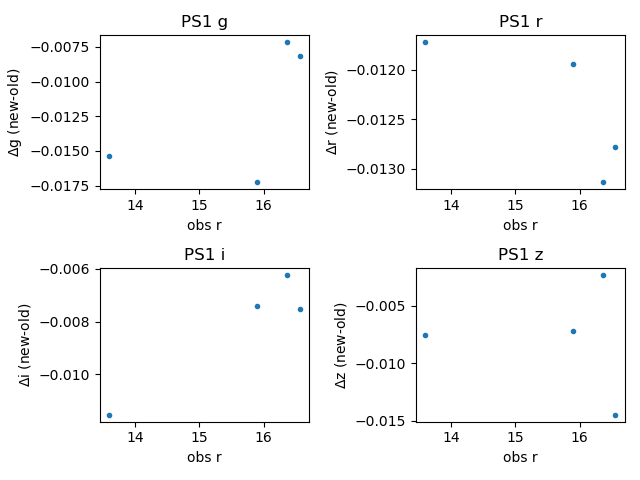

In [66]:
pbs = ['g','r','i','z']
plt.figure()
i = 1
for pb in pbs:
    plt.subplot(2,2,i)
    plt.hist(syn[pb].iloc[inds].values - gautham[pb].values)
    plt.xlabel('$\Delta$'+pb)
    i+=1
plt.tight_layout()

plt.figure()
gr = gautham['obs_g'] - gautham['obs_r']
i = 1
for pb in pbs:
    plt.subplot(2,2,i)
    plt.plot(gr,syn[pb].iloc[inds].values - gautham[pb].values,'.')
    plt.title('PS1 ' +pb)
    plt.ylabel('$\Delta$'+pb + ' (new-old)')
    plt.xlabel('obs g-r')
    i+=1
plt.tight_layout()
plt.savefig('calspec_gautham_vs_new_colour.png')

plt.figure()
gr = gautham['obs_g'] - gautham['obs_r']
i = 1
for pb in pbs:
    plt.subplot(2,2,i)
    plt.plot(gautham['obs_r'],syn[pb].iloc[inds].values - gautham[pb].values,'.')
    plt.title('PS1 ' +pb)
    plt.ylabel('$\Delta$'+pb + ' (new-old)')
    plt.xlabel('obs r')
    i+=1
plt.tight_layout()
plt.savefig('calspec_gautham_vs_new_mag.png')

In [123]:
gautham['obs_'+pb].values

array([15.506, 16.23 , 16.988, 16.443, 16.669, 13.134])

In [121]:
syn['g'][inds].values

array([ 6.92865956,  5.55970147, 11.41418233,  1.62236978])

<IPython.core.display.Javascript object>


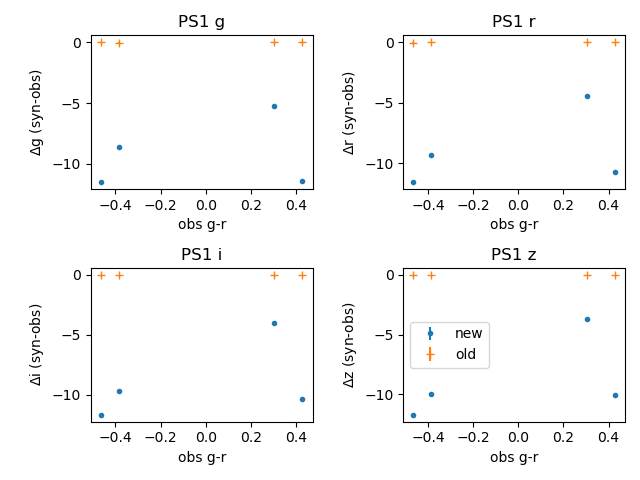

<IPython.core.display.Javascript object>


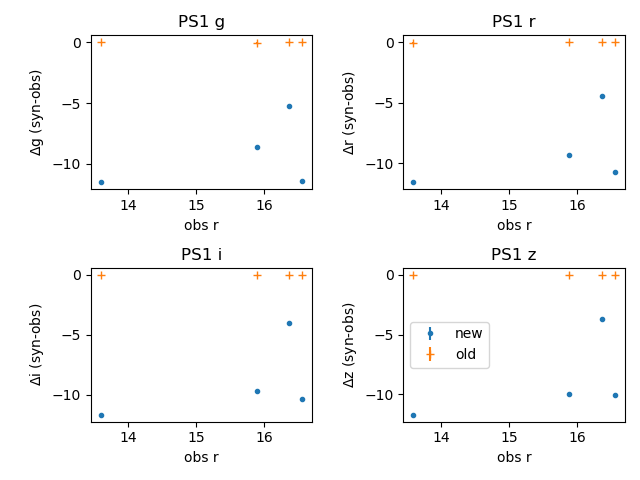

In [139]:
pbs = ['g','r','i','z']

plt.figure()
gr = gautham['obs_g'] - gautham['obs_r']
i = 1
for pb in pbs:
    plt.subplot(2,2,i)
    plt.errorbar(gr,syn[pb][inds].values - gautham['obs_'+pb],yerr=gautham['err_'+pb]*1e-3,fmt='.',label='new')
    plt.errorbar(gr,gautham[pb].values - gautham['obs_'+pb],yerr=gautham['err_'+pb]*1e-3,fmt='+',label='old')
    plt.title('PS1 ' +pb)
    plt.ylabel('$\Delta$'+pb + ' (syn-obs)')
    plt.xlabel('obs g-r')
    i+=1
plt.legend()
plt.tight_layout()
#plt.savefig('calspec_gautham_vs_new_colour.png')

plt.figure()
gr = gautham['obs_g'] - gautham['obs_r']
i = 1
for pb in pbs:
    plt.subplot(2,2,i)
    plt.errorbar(gautham['obs_r'],syn[pb][inds].values - gautham['obs_'+pb],yerr=gautham['err_'+pb]*1e-3,fmt='.',label='new')
    plt.errorbar(gautham['obs_r'],gautham[pb].values - gautham['obs_'+pb],yerr=gautham['err_'+pb]*1e-3,fmt='+',label='old')
    
    plt.title('PS1 ' +pb)
    plt.ylabel('$\Delta$'+pb + ' (syn-obs)')
    plt.xlabel('obs r')
    i+=1
plt.legend()
plt.tight_layout()
#plt.savefig('calspec_gautham_vs_new_mag.png')

In [178]:
gautham

,object,objid,g,r,i,z,obs_g,obs_r,obs_i,obs_z,err_g,err_r,err_i,err_z
0,Snap-1,171512473989538506,15.498,15.894,16.202,16.425,15.506,15.892,16.207,16.425,6,4,2.0,2
1,WD1657+343,149172547130238286,16.228,16.693,17.074,17.360,16.230,16.700,17.074,17.375,4,2,2.0,7
2,SF1615+001A,108002445593133309,16.991,16.563,16.384,16.317,16.988,16.560,16.381,16.314,4,2,2.0,3
3,Snap-2,174682449420946620,16.443,16.045,15.905,15.874,16.443,16.053,15.912,15.873,5,3,3.0,2
4,C26202,74560531369524156,16.673,16.368,16.264,16.243,16.669,16.365,16.258,16.250,4,5,4.0,3
5,KF06T2,188132696582938100,14.418,13.607,13.260,13.087,14.406,13.613,13.272,13.093,2,4,NaN,1
6,GD153,134431942595767273,13.128,13.591,13.978,14.263,13.134,13.598,13.990,14.261,7,1,11.0,2


In [199]:
for pb in pbs:
    ind = np.isfinite(gautham['err_'+pb].values)
    s = gautham[pb].iloc[ind]
    obs = gautham['obs_'+pb].iloc[ind]
    w = 1/(gautham['err_'+pb].iloc[ind])
    print(np.average(obs-s,weights = w),np.sqrt(np.cov(obs-s, aweights=w)))

0.0007466918714563883 0.004635094967609581
0.003796407185628851 0.0053488781288760084
0.001344947735191598 0.005431114617463553
0.0008556701030926023 0.005274026591699355


In [197]:
for pb in pbs:
    ind = np.isfinite(gautham['err_'+pb].values)
    s = syn[pb][inds][ind]
    obs = gautham['obs_'+pb].iloc[ind]
    w = np.ones_like(gautham['err_'+pb].iloc[ind])#gautham['err_'+pb].iloc[ind]
    print(np.average(obs-s,weights = w),np.sqrt(np.cov(obs-s, aweights=w)))

0.010377131444476209 0.01263182531899196
0.016244643749014593 0.007402288258558342
0.013332420619070954 0.01030945615046911
0.010782920208022264 0.007284310429134885


In [180]:
gautham

,object,objid,g,r,i,z,obs_g,obs_r,obs_i,obs_z,err_g,err_r,err_i,err_z
0,Snap-1,171512473989538506,15.498,15.894,16.202,16.425,15.506,15.892,16.207,16.425,6,4,2.0,2
1,WD1657+343,149172547130238286,16.228,16.693,17.074,17.360,16.230,16.700,17.074,17.375,4,2,2.0,7
2,SF1615+001A,108002445593133309,16.991,16.563,16.384,16.317,16.988,16.560,16.381,16.314,4,2,2.0,3
3,Snap-2,174682449420946620,16.443,16.045,15.905,15.874,16.443,16.053,15.912,15.873,5,3,3.0,2
4,C26202,74560531369524156,16.673,16.368,16.264,16.243,16.669,16.365,16.258,16.250,4,5,4.0,3
5,KF06T2,188132696582938100,14.418,13.607,13.260,13.087,14.406,13.613,13.272,13.093,2,4,NaN,1
6,GD153,134431942595767273,13.128,13.591,13.978,14.263,13.134,13.598,13.990,14.261,7,1,11.0,2


In [179]:
ps1

,id,objID,raMean,decMean,raMeanErr,decMeanErr,qualityFlag,gMeanPSFMag,gMeanPSFMagErr,gMeanPSFMagNpt,...,rFlags,rQfPerfect,iFlags,iQfPerfect,zFlags,zQfPerfect,yFlags,yQfPerfect,primaryDetection,bestDetection
0,6,188302657686891252,265.768695,66.917118,0.00259,0.00455,60,13.561900,0.021329,2,...,16892216,0.999634,16892216,0.999696,115000,0.999689,115000,0.999248,1,1
1,25,74560531369524156,53.137003,-27.863434,0.00490,0.01181,60,16.668900,0.003173,11,...,115000,0.999703,115000,0.999673,115000,0.999740,115000,0.998982,1,1
2,65,116423073854643030,307.385465,7.018815,0.01130,0.00605,52,16.482401,0.008010,10,...,115000,0.998546,115000,0.999641,115000,0.999381,115000,0.999657,1,1
3,66,147531834841921291,183.484016,32.942140,0.00369,0.00306,60,14.441900,0.006759,8,...,115000,0.999655,115000,0.999245,115000,0.999365,115000,0.999541,1,1
4,67,119740588420916386,58.842238,9.788353,0.00229,0.00210,52,14.463700,0.004830,10,...,115000,0.999141,115000,0.999702,115000,0.999095,115000,0.999285,1,1
5,92,163812020473857533,202.047136,46.514023,0.00344,0.01069,52,17.040899,0.001365,7,...,115000,0.999385,115000,0.999635,115000,0.998218,115000,0.999604,1,1
6,94,108002445593133309,244.559341,0.002348,0.00192,0.00195,60,16.987499,0.004338,8,...,115000,0.999699,115000,0.999270,115000,0.999197,115000,0.999379,1,1
7,96,174682449420946620,244.942074,55.571584,0.00111,0.00189,60,16.442900,0.005196,5,...,115000,0.998261,115000,0.999604,115000,0.999218,115000,0.999660,1,1
8,100,210591494755034403,149.475073,85.494597,0.00850,0.02183,60,15.599900,0.008496,6,...,115000,0.999680,115000,0.999545,115000,0.999630,115000,0.999571,1,1
9,101,162141574383452319,157.438212,45.118042,0.00272,0.00632,52,15.936200,0.006202,8,...,115000,0.999655,115000,0.999381,115000,0.999762,115000,0.998973,1,1


In [123]:
for pb in pbs:
    print(np.average(syn[pb][inds] - gautham['obs_'+pb],weights = 1/gautham['err_'+pb]))

,id,objID,raMean,decMean,raMeanErr,decMeanErr,qualityFlag,gMeanPSFMag,gMeanPSFMagErr,gMeanPSFMagNpt,...,rFlags,rQfPerfect,iFlags,iQfPerfect,zFlags,zQfPerfect,yFlags,yQfPerfect,primaryDetection,bestDetection
0,6,188302657686891252,265.768695,66.917118,0.00259,0.00455,60,13.561900,0.021329,2,...,16892216,0.999634,16892216,0.999696,115000,0.999689,115000,0.999248,1,1
1,25,74560531369524156,53.137003,-27.863434,0.00490,0.01181,60,16.668900,0.003173,11,...,115000,0.999703,115000,0.999673,115000,0.999740,115000,0.998982,1,1
2,65,116423073854643030,307.385465,7.018815,0.01130,0.00605,52,16.482401,0.008010,10,...,115000,0.998546,115000,0.999641,115000,0.999381,115000,0.999657,1,1
3,66,147531834841921291,183.484016,32.942140,0.00369,0.00306,60,14.441900,0.006759,8,...,115000,0.999655,115000,0.999245,115000,0.999365,115000,0.999541,1,1
4,67,119740588420916386,58.842238,9.788353,0.00229,0.00210,52,14.463700,0.004830,10,...,115000,0.999141,115000,0.999702,115000,0.999095,115000,0.999285,1,1
5,92,163812020473857533,202.047136,46.514023,0.00344,0.01069,52,17.040899,0.001365,7,...,115000,0.999385,115000,0.999635,115000,0.998218,115000,0.999604,1,1
6,94,108002445593133309,244.559341,0.002348,0.00192,0.00195,60,16.987499,0.004338,8,...,115000,0.999699,115000,0.999270,115000,0.999197,115000,0.999379,1,1
7,96,174682449420946620,244.942074,55.571584,0.00111,0.00189,60,16.442900,0.005196,5,...,115000,0.998261,115000,0.999604,115000,0.999218,115000,0.999660,1,1
8,100,210591494755034403,149.475073,85.494597,0.00850,0.02183,60,15.599900,0.008496,6,...,115000,0.999680,115000,0.999545,115000,0.999630,115000,0.999571,1,1
9,101,162141574383452319,157.438212,45.118042,0.00272,0.00632,52,15.936200,0.006202,8,...,115000,0.999655,115000,0.999381,115000,0.999762,115000,0.998973,1,1


In [124]:
gautham

,object,objid,g,r,i,z,obs_g,obs_r,obs_i,obs_z
0,Snap-1,171512473989538506,15.498,15.894,16.202,16.425,15.506,15.892,16.207,16.425
1,WD1657+343,149172547130238286,16.228,16.693,17.074,17.360,16.230,16.700,17.074,17.375
2,SF1615+001A,108002445593133309,16.991,16.563,16.384,16.317,16.988,16.560,16.381,16.314
3,Snap-2,174682449420946620,16.443,16.045,15.905,15.874,16.443,16.053,15.912,15.873
4,C26202,74560531369524156,16.673,16.368,16.264,16.243,16.669,16.365,16.258,16.250
5,KF06T2,188132696582938100,14.418,13.607,13.260,13.087,14.406,13.613,13.272,13.093
6,GD153,134431942595767273,13.128,13.591,13.978,14.263,13.134,13.598,13.990,14.261


In [61]:
ps1

,id,objID,raMean,decMean,raMeanErr,decMeanErr,qualityFlag,gMeanPSFMag,gMeanPSFMagErr,gMeanPSFMagNpt,...,rQfPerfect,iFlags,iQfPerfect,zFlags,zQfPerfect,yFlags,yQfPerfect,primaryDetection,bestDetection,name
0,6,188302657686891252,265.768695,66.917118,0.00259,0.00455,60,13.561900,0.021329,2,...,0.999634,16892216,0.999696,115000,0.999689,115000,0.999248,1,1,1743045
1,25,74560531369524156,53.137003,-27.863434,0.00490,0.01181,60,16.668900,0.003173,11,...,0.999703,115000,0.999673,115000,0.999740,115000,0.998982,1,1,c26202
2,65,116423073854643030,307.385465,7.018815,0.01130,0.00605,52,16.482401,0.008010,10,...,0.998546,115000,0.999641,115000,0.999381,115000,0.999657,1,1,hs2027
3,66,147531834841921291,183.484016,32.942140,0.00369,0.00306,60,14.441900,0.006759,8,...,0.999655,115000,0.999245,115000,0.999365,115000,0.999541,1,1,hz21
4,67,119740588420916386,58.842238,9.788353,0.00229,0.00210,52,14.463700,0.004830,10,...,0.999141,115000,0.999702,115000,0.999095,115000,0.999285,1,1,hz4
5,92,163812020473857533,202.047136,46.514023,0.00344,0.01069,52,17.040899,0.001365,7,...,0.999385,115000,0.999635,115000,0.998218,115000,0.999604,1,1,sdss132811
6,94,108002445593133309,244.559341,0.002348,0.00192,0.00195,60,16.987499,0.004338,8,...,0.999699,115000,0.999270,115000,0.999197,115000,0.999379,1,1,sf1615_001a
7,96,174682449420946620,244.942074,55.571584,0.00111,0.00189,60,16.442900,0.005196,5,...,0.998261,115000,0.999604,115000,0.999218,115000,0.999660,1,1,snap2
8,100,210591494755034403,149.475073,85.494597,0.00850,0.02183,60,15.599900,0.008496,6,...,0.999680,115000,0.999545,115000,0.999630,115000,0.999571,1,1,wd0947_857
9,101,162141574383452319,157.438212,45.118042,0.00272,0.00632,52,15.936200,0.006202,8,...,0.999655,115000,0.999381,115000,0.999762,115000,0.998973,1,1,wd1026_453
